## Training Naïve Bayes

<table>
        <thead>
            <tr>
                <th rowspan="2">Modelo</th>
                <th rowspan="2">Acurácia</th>
                <th colspan="3">Precisão</th>
                <th colspan="3">Recall</th>
                <th colspan="3">F1-Score</th>
            </tr>
            <tr>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>NB - All</td>
                <td>41%</td>
                <td>0.18</td>
                <td>0.71</td>
                <td>0.43</td>
                <td>0.57</td>
                <td>0.40</td>
                <td>0.33</td>
                <td>0.28</td>
                <td>0.51</td>
                <td>0.38</td>
            </tr>
            <tr>
                <td>NB - Selected</td>
                <td>98%</td>
                <td>1.00</td>
                <td>0.97</td>
                <td>1.00</td>
                <td>0.86</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.92</td>
                <td>0.98</td>
                <td>1.00</td>
            </tr>
</table>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Recovering the data

In [84]:
X_train = pd.read_csv("../datasets/opckd_datasets/X_train.csv")
X_test  = pd.read_csv("../datasets/opckd_datasets/X_test.csv")
y_train = pd.read_csv("../datasets/opckd_datasets/y_train.csv").values.ravel()
y_test  = pd.read_csv("../datasets/opckd_datasets/y_test.csv").values.ravel()

In [85]:
print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes:
X_train: (7242, 27)
X_test: (1323, 27)
y_train: (7242,)
y_test: (1323,)


#### Training the NB with all variables

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [87]:
nb = GaussianNB()

In [88]:
param_grid = {
    "var_smoothing": np.logspace(-12, -6, 20)
}

In [89]:
# applying hyperparameter selection with Grid Search
grid = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [90]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-12, 2.06913808e-12, 4.28133240e-12, 8.85866790e-12,
       1.83298071e-11, 3.79269019e-11, 7.84759970e-11, 1.62377674e-10,
       3.35981829e-10, 6.95192796e-10, 1.43844989e-09, 2.97635144e-09,
       6.15848211e-09, 1.27427499e-08, 2.63665090e-08, 5.45559478e-08,
       1.12883789e-07, 2.33572147e-07, 4.83293024e-07, 1.00000000e-06])},
             scoring='accuracy')

In [91]:
print("Melhores hiperparâmetros encontrados:")
print(grid.best_params_)
print("\nMelhor score de validação:", grid.best_score_)

Melhores hiperparâmetros encontrados:
{'var_smoothing': 1e-12}

Melhor score de validação: 0.7051995279655621


In [92]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

##### Results of the model with all the features

In [93]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns

In [94]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

In [95]:
print("\n==================== MÉTRICAS ====================")
print(f"Acurácia:  {acc:.4f}")
print(f"Precisão:  {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")


==================== MÉTRICAS ====================
Acurácia:  0.6440
Precisão:  0.7123
Recall:    0.6440
F1-score:  0.6565


In [96]:
print("\n==================== CLASSIFICATION REPORT ====================")
print(classification_report(y_test, y_pred, zero_division=0))


==================== CLASSIFICATION REPORT ====================
              precision    recall  f1-score   support

         0.0       0.46      0.73      0.56       418
         1.0       0.83      0.60      0.70       905

    accuracy                           0.64      1323
   macro avg       0.64      0.67      0.63      1323
weighted avg       0.71      0.64      0.66      1323



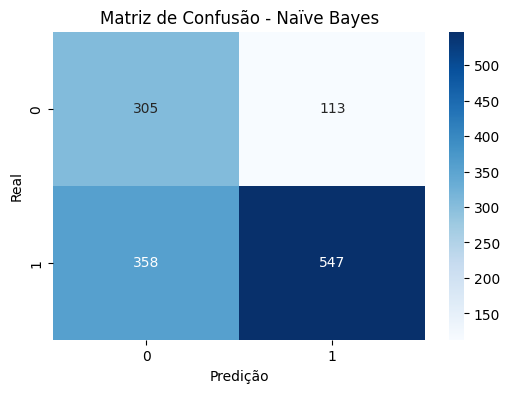

In [97]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Naïve Bayes")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

#### Training the NB with the K selected variables

In [98]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [99]:
feature_names = X_train.columns.tolist()
n_features = X_train.shape[1]
k_values = list(range(1, n_features + 1))

In [100]:
pipe = Pipeline([
    ("select", SelectKBest(score_func=f_classif)),
    ("nb", GaussianNB())
])

In [101]:
param_grid = {
    "select__k": k_values
}

In [102]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    return_train_score=False,
    n_jobs=-1
)

In [103]:
grid.fit(X_train, y_train)
results = grid.cv_results_

print("\n Melhor combinação encontrada:")
print(grid.best_params_)

best_k = grid.best_params_["select__k"]
print(f"\n Melhor K encontrado: {best_k}")


 Melhor combinação encontrada:
{'select__k': 12}

 Melhor K encontrado: 12


c:\Users\luizf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\luizf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [104]:
best_selector = grid.best_estimator_.named_steps["select"]
mask = best_selector.get_support()
selected_features = X_train.columns[mask].tolist()

print("\n Features selecionadas:")
for f in selected_features:
    print(" -", f)


 Features selecionadas:
 - Age
 - BMI
 - Albumin
 - Calcium
 - Phosphate
 - ALP
 - Glucose
 - HGB
 - Gender
 - OA
 - CVA
 - Fragility fracture hx


In [105]:
X_train_sel = best_selector.transform(X_train)
X_test_sel  = best_selector.transform(X_test)

In [106]:
best_nb = grid.best_estimator_.named_steps["nb"]
best_nb.fit(X_train_sel, y_train)

GaussianNB()

In [107]:
y_pred = best_nb.predict(X_test_sel)

##### Results of the model with the selected features

In [108]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

In [109]:
print("\n==================== MÉTRICAS MODELO FINAL ====================")
print(f"Acurácia:   {acc:.4f}")
print(f"Precisão:   {prec:.4f}")
print(f"Recall:     {rec:.4f}")
print(f"F1-score:   {f1:.4f}")


==================== MÉTRICAS MODELO FINAL ====================
Acurácia:   0.6878
Precisão:   0.7205
Recall:     0.6878
F1-score:   0.6970


In [110]:
print("\n==================== CLASSIFICATION REPORT ====================")
print(classification_report(y_test, y_pred, zero_division=0))


==================== CLASSIFICATION REPORT ====================
              precision    recall  f1-score   support

         0.0       0.50      0.67      0.58       418
         1.0       0.82      0.70      0.75       905

    accuracy                           0.69      1323
   macro avg       0.66      0.68      0.66      1323
weighted avg       0.72      0.69      0.70      1323



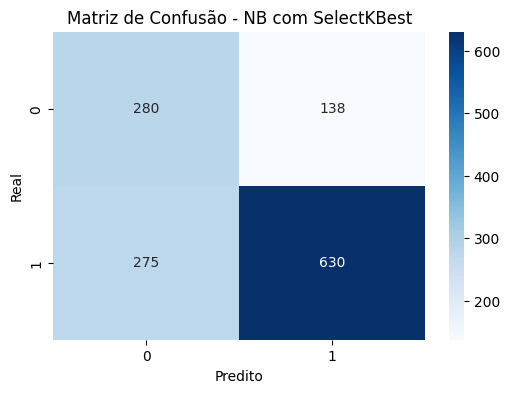

In [111]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - NB com SelectKBest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [112]:
from sklearn.model_selection import learning_curve

In [113]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_nb,
    X=X_train_sel,
    y=y_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

In [114]:
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

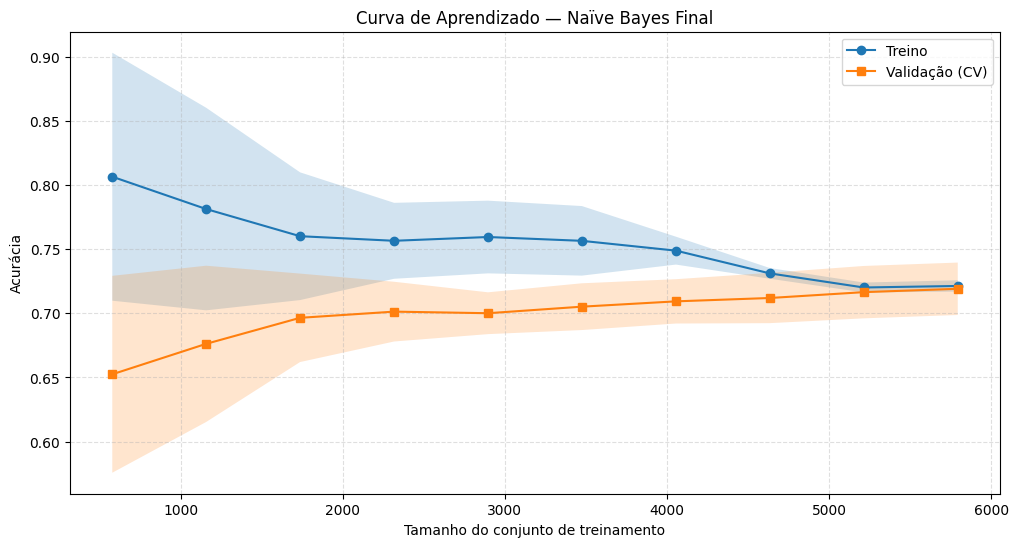

In [115]:
plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean, marker="o", label="Treino")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(train_sizes, val_mean, marker="s", label="Validação (CV)")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.title("Curva de Aprendizado — Naïve Bayes Final")
plt.xlabel("Tamanho do conjunto de treinamento")
plt.ylabel("Acurácia")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.show()